# หนังสือ Data Science วิเคราะห์การตลาด ด้วย Python
---
### บทที่ 4 การแบ่งกลุ่มลูกค้า

#### ตัวอย่าง 4.1

In [1]:
# ตัวอย่าง 4.1 
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

df = pd.read_csv("data/Mall_Customers.csv")
df.head(3)
df.info()

# Renaming columns
df.rename({'Annual Income (k$)':'Income',
              'Spending Score (1-100)':'Spend_score'},
             axis=1, 
             inplace=True)
df.head()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### ตัวอย่าง 4.2

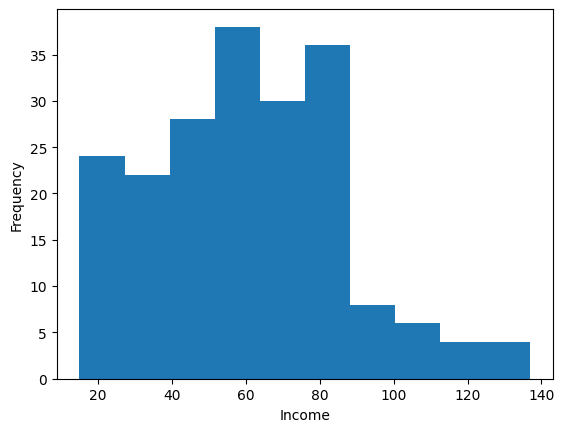

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


In [2]:
# ตัวอย่าง 4.2 
df.Income.plot.hist()
plt.xlabel('Income')
plt.show();

## สร้างคอลัมน์ใหม่ 'Cluster'
## กำหนดรายได้ < 50, 50 – 90 และ >= 90 ตามลำดับ
df['Cluster'] = np.where(df.Income >= 90, 'High earners',
                         np.where(df.Income < 50,
                                  'Low Income', 'Moderate Income'))

df.groupby('Cluster')['Income'].describe()

#### ตัวอย่าง 4.3

In [3]:
# ตัวอย่าง 4.3 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = ['Age', 'Income', 'Spend_score']
df[cols_to_scale]

data_scaled = df.copy()
data_scaled[cols_to_scale]
data_scaled[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

data_scaled[cols_to_scale].describe()

,Age,Income,Spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


#### ตัวอย่าง 4.4

In [4]:
# ตัวอย่าง 4.4: Calculating distance between customers
sel_cols = ['Income', 'Spend_score']
cust3 = data_scaled[sel_cols].head(3)
cust3

from scipy.spatial.distance import cdist
cdist(cust3, cust3, metric='euclidean')

np.sqrt((-1.739+1.739)**2 + (-0.4348-1.1957)**2)

1.6305

#### ตัวอย่าง 4.5

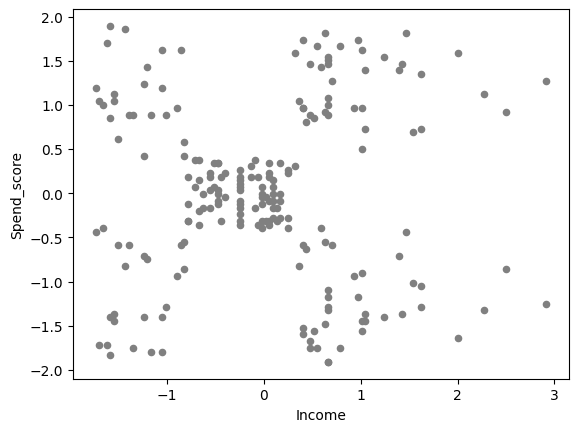

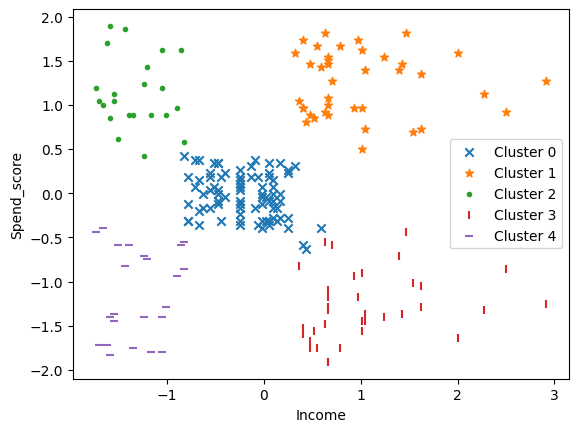

In [5]:
# ตัวอย่าง 4.5: k-means Clustering on Mall Customers
cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

data_scaled.plot.scatter(x='Income', y='Spend_score', color='gray')
plt.show();

from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42, n_init=10)
model

model.fit(data_scaled[cluster_cols])

data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled.head(3)

markers = ['x', '*', '.','|','_']

for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score,
                marker=markers[clust],
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show();

#### ตัวอย่าง 4.6

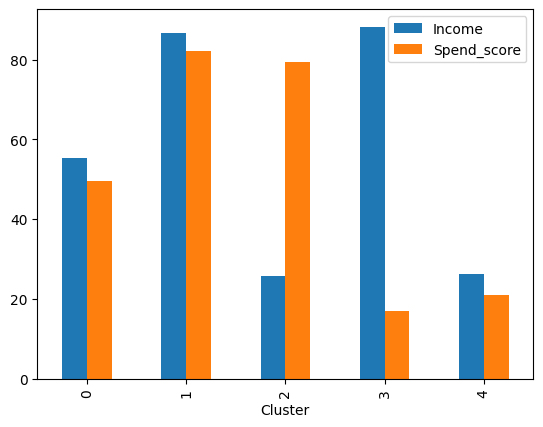

In [6]:
# ตัวอย่าง 4.6: ตั้งชื่อคลัสเตอร์
df['Cluster'] = data_scaled.Cluster
df.groupby('Cluster')[['Income', 'Spend_score']].mean().plot.bar()
plt.show();

#### กิจกรรม 4.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


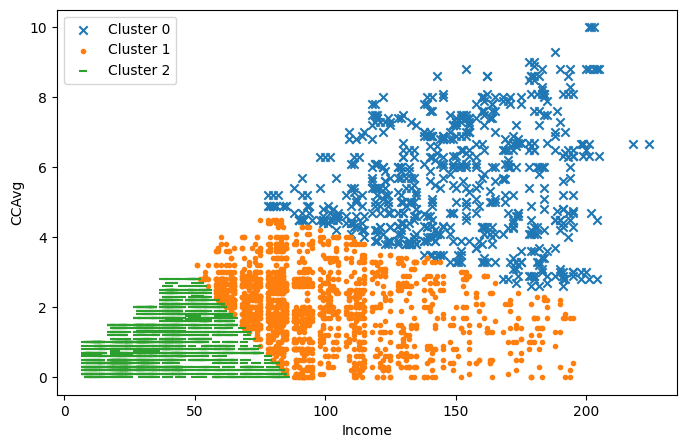

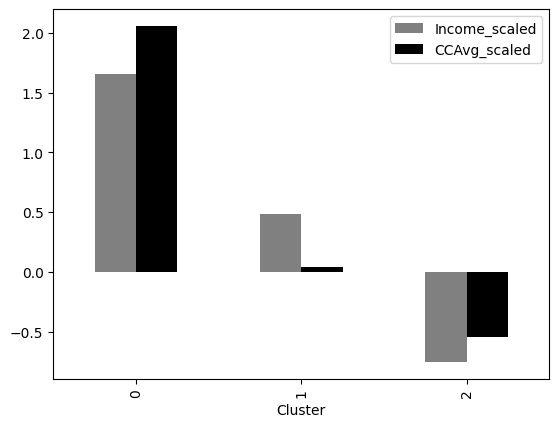

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,150.035826,5.533396,43.992212,88.979751,2.015576,0.285047,0.604361,0.412773
1,96.250279,2.010123,45.160894,65.159218,2.365363,0.296089,0.598883,0.120112
2,39.042056,0.988758,45.798676,42.341900,2.513240,0.294782,0.593458,0.000000


In [27]:
# กิจกรรม 4.1 - Bank Customer Segmentation for Loan Campaign
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

bank0 = pd.read_csv("data/Bank_Personal_Loan_Modelling-1.csv")
bank0.head()
bank0.info()

scaler = StandardScaler()

bank0[['Income_scaled','CCAvg_scaled']]=scaler.fit_transform\
                                    (bank0[['Income','CCAvg']])
bank0[['Income_scaled','CCAvg_scaled']].describe()

model = KMeans(n_clusters=3,random_state=1, n_init=10)

cluster_cols = ['Income_scaled', 'CCAvg_scaled']
model.fit(bank0[cluster_cols])

bank0['Cluster'] = model.predict(bank0[cluster_cols])

markers = ['x', '.', '_']

plt.figure(figsize=[8,5])
for clust in range(3):
    temp = bank0[bank0.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg, 
                marker=markers[clust], 
                label="Cluster "+str(clust) )

plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show();

bank0.groupby('Cluster')[['Income', 'CCAvg']].mean()

bank0.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']]\
                        .mean().plot.bar(color=['gray','black'])
plt.show();

sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', 
            'CreditCard', 'Online', 'Personal Loan']

bank0.groupby('Cluster')[sel_cols].mean()

#### ตัวอย่าง 4.7

0     -0.615720
1     -1.665793
2      0.337862
3     -1.456573
4     -0.038465
         ...   
195   -1.093705
196    0.800448
197   -1.119709
198    0.395411
199   -1.488004
Name: pc1, Length: 200, dtype: float64 0     -1.763481
1     -1.820747
2     -1.674799
3     -1.772430
4     -1.662740
         ...   
195    2.215577
196    2.540748
197    2.445169
198    2.946665
199    2.847018
Name: pc2, Length: 200, dtype: float64


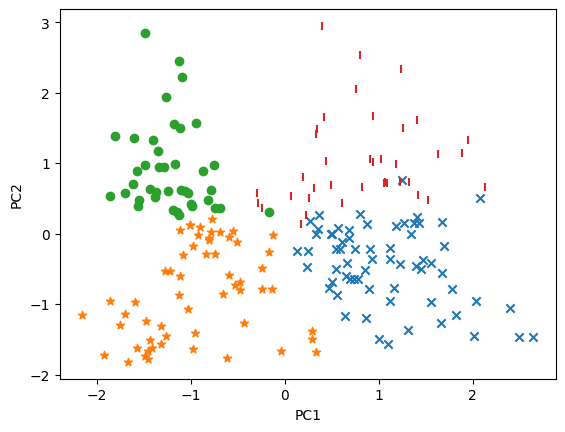

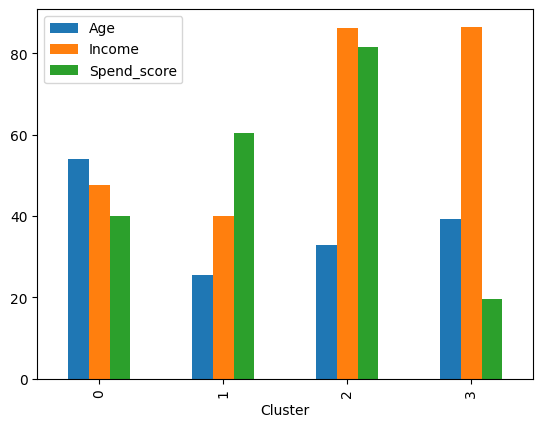

In [7]:
# ตัวอย่างที่ 4.7: Dealing with High-Dimensional Data
cluster_cols = ['Age', 'Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

model = KMeans(n_clusters=4, random_state=1, n_init=10)
model.fit(data_scaled[cluster_cols])

data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]
print(data_scaled['pc1'], data_scaled['pc2'])

markers = ['x', '*', 'o','|']

for clust in range(4):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], 
                label="Cluster "+str(clust))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show();

df['Cluster'] = data_scaled.Cluster
df.groupby('Cluster')[['Age', 'Income','Spend_score']].mean()

df.groupby('Cluster')[['Age', 'Income','Spend_score']].mean()\
                                                .plot.bar()
plt.show();

#### กิจกรรม 4.2

In [ ]:
# กิจกรรม 4.2 - Bank Customer Segmentation with Multiple Features
bank_scaled = bank0.copy()

cluster_cols = ['Income','CCAvg','Age','Experience','Mortgage']

bank_scaled[cluster_cols]=scaler.fit_transform(bank_scaled[cluster_cols])

bank_scaled[cluster_cols].describe()

model = KMeans(n_clusters=3, random_state=2024, n_init=10)
model.fit(bank_scaled[cluster_cols])

bank_scaled['Cluster'] = model.predict(bank_scaled[cluster_cols])

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(bank_scaled[cluster_cols])

bank_scaled['pc1'] = pca_res[:,0]
bank_scaled['pc2'] = pca_res[:,1]

markers = ['x', '.', '_']
plt.figure(figsize=[10,12])

for clust in range(3):
    temp = bank_scaled[bank_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], 
                label="Cluster "+str(clust))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show();

bank0['Cluster'] = bank_scaled.Cluster
bank0.groupby('Cluster')[cluster_cols].mean()

sel_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage', 
            'Family', 'CreditCard', 'Online', 'Personal Loan']

bank0.groupby('Cluster')[sel_cols].mean()